# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [32]:
#let import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
3,4,151.5,41.3,58.5,18.5
195,196,38.2,3.7,13.8,7.6
14,15,204.1,32.9,46.0,19.0
63,64,102.7,29.6,8.4,14.0
8,9,8.6,2.1,1.0,4.8


# EDA Process

Univariate Analysis

In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Data Inspection

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.shape

(200, 5)

In [14]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

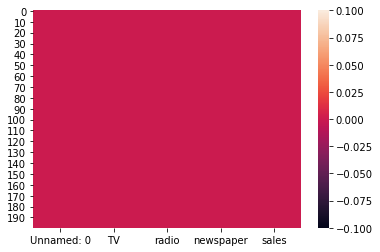

In [16]:
import seaborn as sns
sns.heatmap(df.isnull())

# SCATTER Plot

<AxesSubplot:xlabel='sales', ylabel='TV'>

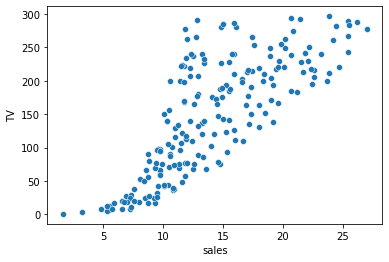

In [23]:
import seaborn as sns
sns.scatterplot(y="TV",x= "sales",data=df)

from above observation:

    1. TV feature increases ,sales is also increase.
    2. TV seen is directly proportional to sales.
    
Advertising on tv increases sales.

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

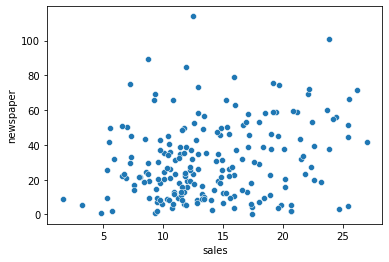

In [24]:
sns.scatterplot(y="newspaper",x= "sales",data=df)

from above observation:

    1. newspaper increases the sales.
    2. newspaper feature increases the sales.

<AxesSubplot:xlabel='sales', ylabel='radio'>

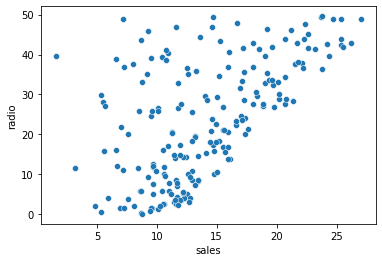

In [25]:
sns.scatterplot(y="radio",x= "sales",data=df)

from above observation:

    1. Advertising on radio is efficient.
    2. As increase in advertisment on radio increase the overall sales of the product.
    


Advertising is more efficient on TV and radio as comparison to newspaper.

# Data cleaning:

In [41]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

# Correlation:

In [42]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


from above observation:

    1.TV feature is in good relation with sales.
    2. radio and newspaper are in positive relation with sales
    3.No negatively correlated column is present as from above analysis.

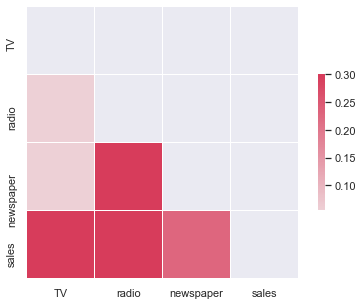

In [49]:
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

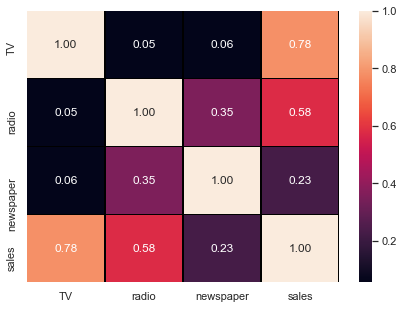

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

from above observation:

    1. Impact of TV on increasing sales is more then rest of the features columns.
    2. Radio is impacting modrate.
    3. newspaper is impacting less from TV and radio .
    


# Describe Heatmap

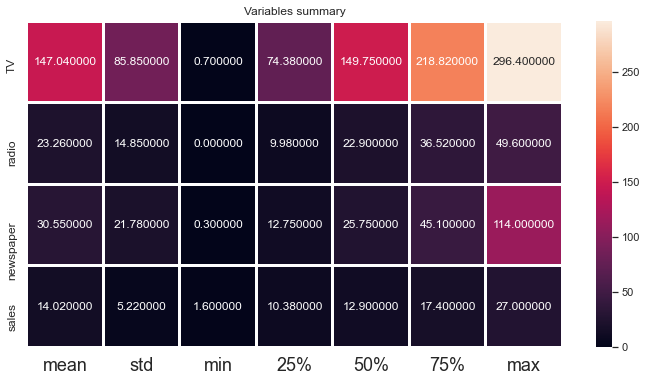

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()


# Discription of dataset

In [55]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Now use subplot and displot to check data are normalised or not.

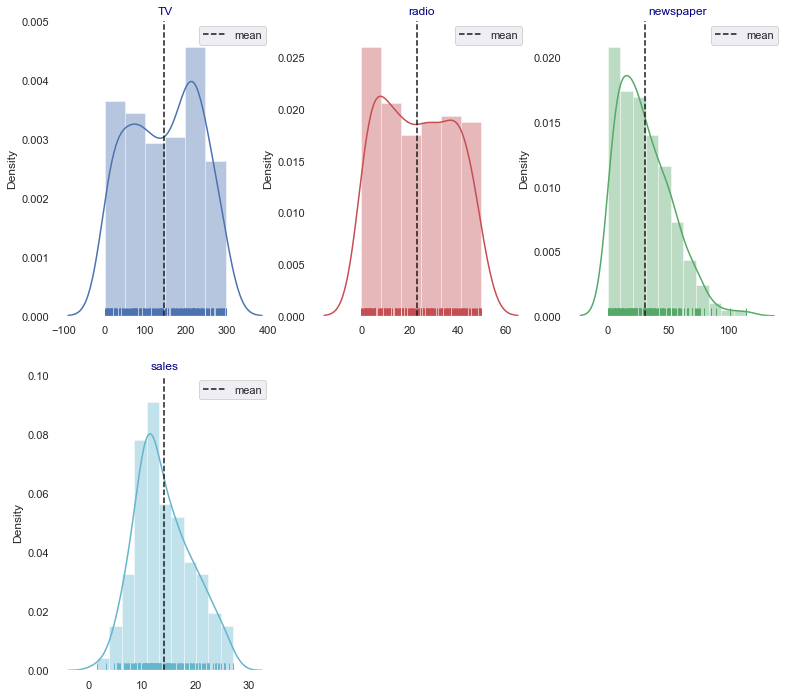

In [65]:
import itertools

cols = ['TV', 'radio', 'newspaper', 'sales']
length = len(cols)
cs = ["b","r","g","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observation:

As building blocks are out of the normal distribution curve;hence outliers are present and we do data cleaning as well.

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

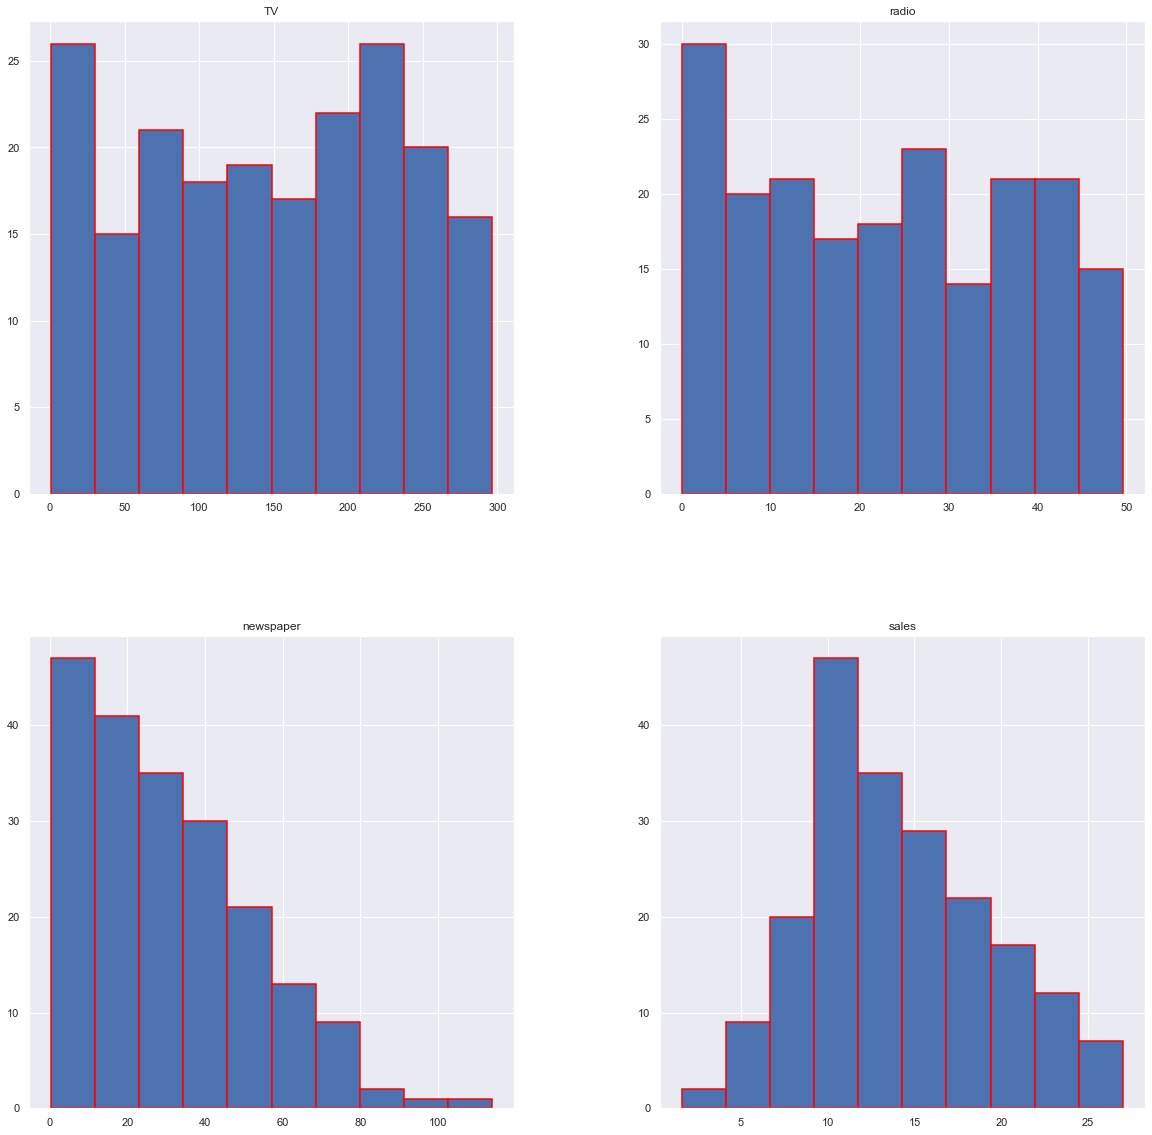

In [66]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

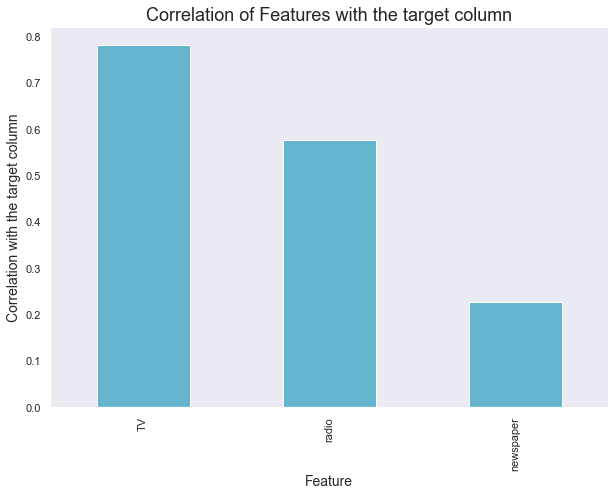

In [68]:
plt.figure(figsize=(10,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


In [69]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

newspaper column is moderately skewed.

# Detecting outliers

<AxesSubplot:>

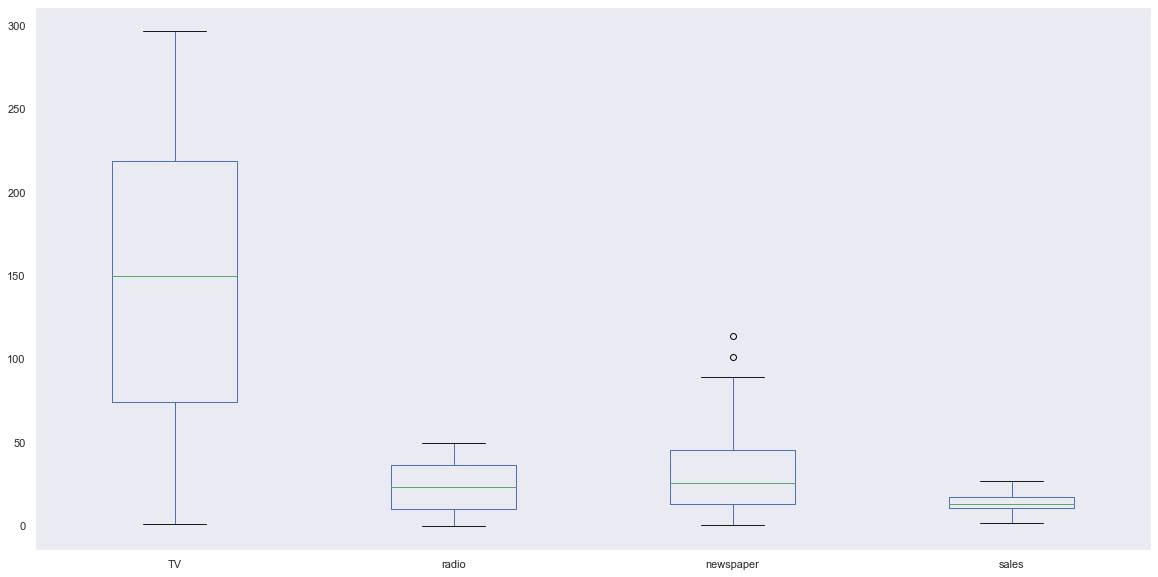

In [70]:
df.plot.box(figsize=(20,10))

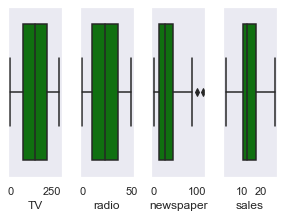

In [71]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in newspaper columns.

# Check the percentage of data falls under outliers:

In [72]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [73]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [75]:
percentage_loss=((200-198)/198)*100
print(percentage_loss)

1.0101010101010102


The data loss is below 10 percentile so we can proceed futher data cleaning.

In [76]:
df_new.shape

(198, 4)

In [77]:
x=df_new.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [78]:
y=df_new.iloc[:,-1]

In [79]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Removing skewness by transforming data.

In [80]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# Since the column has continouse data type we will use Linear Regression model.

# Regressor Model Building:
Linear Regression:

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [87]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 112  The model performs very well
At random_state:- 112
Training r2_score is:- 90.17428654220274
Testing r2_score is:- 90.16708364952682
At random state 510  The model performs very well
At random_state:- 510
Training r2_score is:- 90.41100608643733
Testing r2_score is:- 90.41484328551749


In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=510)

In [89]:


lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.9041484328551749

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

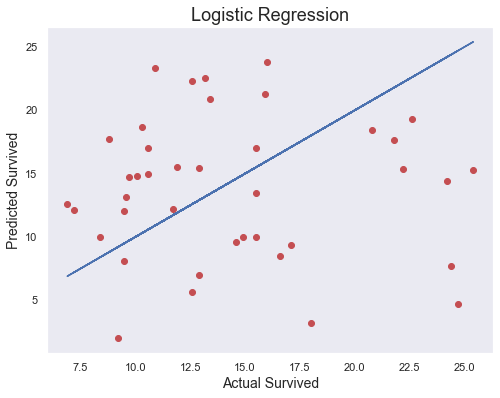

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [95]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [96]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 90.14616379006017
R2_score is :- 90.73427448807216


At cv:- 3
Cross validation score is:- 89.72351383573026
R2_score is :- 90.73427448807216


At cv:- 4
Cross validation score is:- 89.80785666814384
R2_score is :- 90.73427448807216


At cv:- 5
Cross validation score is:- 89.57805874289184
R2_score is :- 90.73427448807216


At cv:- 6
Cross validation score is:- 89.81682352909685
R2_score is :- 90.73427448807216


At cv:- 7
Cross validation score is:- 89.46701250358076
R2_score is :- 90.73427448807216


At cv:- 8
Cross validation score is:- 89.81744733610321
R2_score is :- 90.73427448807216


At cv:- 9
Cross validation score is:- 89.36472532637083
R2_score is :- 90.73427448807216




In [97]:
print("At cv:-",2)
print("Cross validation score is:-",90.14 )
print("R2_score is :-",90.73)

At cv:- 2
Cross validation score is:- 90.14
R2_score is :- 90.73


In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [99]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 1.2554851904308832
Mean Squared Error: 2.7531342870846336
Root Mean Square Error: 1.6592571491738806


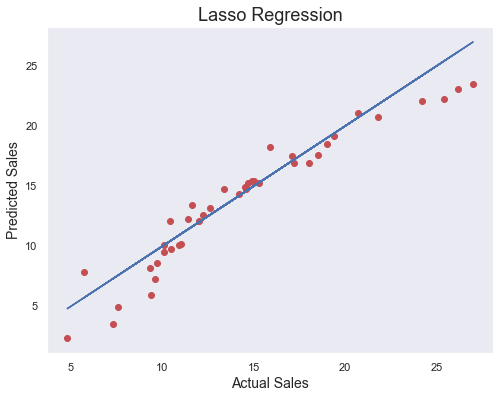

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [101]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [112]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 90.53994674638164
Cross Val Score: 90.15897912499331
At cv:- 3
R2 Score: 90.53994674638164
Cross Val Score: 89.73959487390134
At cv:- 4
R2 Score: 90.53994674638164
Cross Val Score: 89.85750110186788
At cv:- 5
R2 Score: 90.53994674638164
Cross Val Score: 89.59738953932849
At cv:- 6
R2 Score: 90.53994674638164
Cross Val Score: 89.8593941912098
At cv:- 7
R2 Score: 90.53994674638164
Cross Val Score: 89.49869234042373
At cv:- 8
R2 Score: 90.53994674638164
Cross Val Score: 89.81424529017819
At cv:- 9
R2 Score: 90.53994674638164
Cross Val Score: 89.3907285652422


In [105]:
print("At cv:-",2)
print("Cross validation score is:-",90.15 )
print("R2_score is :-",90.53)

At cv:- 2
Cross validation score is:- 90.15
R2_score is :- 90.53


In [106]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 1.2704347667414544
Mean Squared Error: 2.810875083300872
Root Mean Square Error: 1.6765664565715468


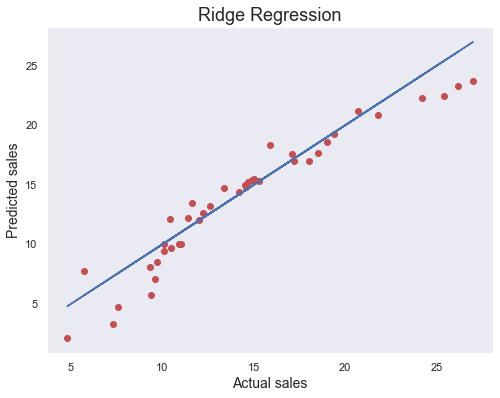

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'random'}


In [113]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features= 'auto')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 96.37870165011392
Cross Val Score: 91.97411085333766
At cv:- 3
R2 Score: 96.37870165011392
Cross Val Score: 94.11533185212657
At cv:- 4
R2 Score: 96.37870165011392
Cross Val Score: 93.95907053556928
At cv:- 5
R2 Score: 96.37870165011392
Cross Val Score: 95.14899681027946
At cv:- 6
R2 Score: 96.37870165011392
Cross Val Score: 94.42718523217395
At cv:- 7
R2 Score: 96.37870165011392
Cross Val Score: 94.84460070916717
At cv:- 8
R2 Score: 96.37870165011392
Cross Val Score: 95.35376044584703
At cv:- 9
R2 Score: 96.37870165011392
Cross Val Score: 94.59256444262196


In [114]:
print("At cv:-",8)
print("Cross validation score is:-",95.35 )
print("R2_score is :-",96.37)

At cv:- 8
Cross validation score is:- 95.35
R2_score is :- 96.37


In [115]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.8349999999999997
Mean Squared Error: 1.0759999999999994
Root Mean Square Error: 1.0373041983911948


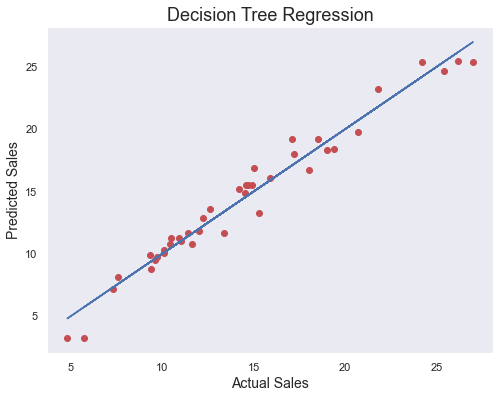

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# RandomForestRegressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 300}


In [121]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300, max_features= 'auto')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(18,30):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 18
R2 Score: 98.50914547044151
Cross Val Score: 97.8973851911001
At cv:- 19
R2 Score: 98.50914547044151
Cross Val Score: 98.03462577169911
At cv:- 20
R2 Score: 98.50914547044151
Cross Val Score: 97.64531048733632
At cv:- 21
R2 Score: 98.50914547044151
Cross Val Score: 97.5580095352919
At cv:- 22
R2 Score: 98.50914547044151
Cross Val Score: 97.50528577793527
At cv:- 23
R2 Score: 98.50914547044151
Cross Val Score: 97.6610189852223
At cv:- 24
R2 Score: 98.50914547044151
Cross Val Score: 97.76463128018
At cv:- 25
R2 Score: 98.50914547044151
Cross Val Score: 97.81062737372251
At cv:- 26
R2 Score: 98.50914547044151
Cross Val Score: 97.72629497702513
At cv:- 27
R2 Score: 98.50914547044151
Cross Val Score: 97.71473064213126
At cv:- 28
R2 Score: 98.50914547044151
Cross Val Score: 97.59271128901294
At cv:- 29
R2 Score: 98.50914547044151
Cross Val Score: 97.33668579854877


In [122]:
print("At cv:-",19)
print("Cross validation score is:-",98.03)
print("R2_score is :-",98.50)

At cv:- 19
Cross validation score is:- 98.03
R2_score is :- 98.5


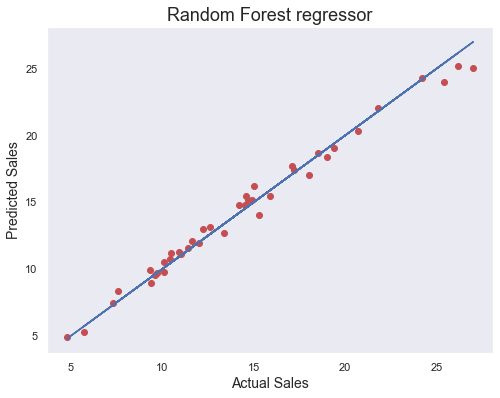

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [124]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [128]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 98.77807868695926
Cross Val Score: 97.4092453883574
At cv:- 3
R2 Score: 98.77807868695926
Cross Val Score: 97.6986407741085
At cv:- 4
R2 Score: 98.77807868695926
Cross Val Score: 97.92892277450864
At cv:- 5
R2 Score: 98.77807868695926
Cross Val Score: 97.85294114865842
At cv:- 6
R2 Score: 98.77807868695926
Cross Val Score: 97.73998312209001
At cv:- 7
R2 Score: 98.77807868695926
Cross Val Score: 97.73612663303976
At cv:- 8
R2 Score: 98.77807868695926
Cross Val Score: 97.93367765450915
At cv:- 9
R2 Score: 98.77807868695926
Cross Val Score: 97.67805397074434


In [129]:
print("At cv:-",8)
print("Cross validation score is:-",97.933)
print("R2_score is :-",98.77)

At cv:- 8
Cross validation score is:- 97.933
R2_score is :- 98.77


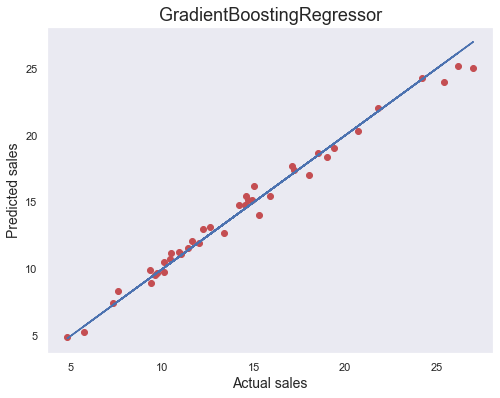

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [131]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'rbf'}


In [133]:
sv = SVR(kernel = 'rbf', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 89.99673881801968
Cross Val Score: 86.7087205934325
At cv:- 3
R2 Score: 89.99673881801968
Cross Val Score: 89.95004770726295
At cv:- 4
R2 Score: 89.99673881801968
Cross Val Score: 91.35664532798353
At cv:- 5
R2 Score: 89.99673881801968
Cross Val Score: 92.06732781421024
At cv:- 6
R2 Score: 89.99673881801968
Cross Val Score: 92.13872678956508
At cv:- 7
R2 Score: 89.99673881801968
Cross Val Score: 92.16342932787298
At cv:- 8
R2 Score: 89.99673881801968
Cross Val Score: 92.2375364590018
At cv:- 9
R2 Score: 89.99673881801968
Cross Val Score: 92.2263202956463


In [135]:
print("At cv:-",3)
print("Cross validation score is:-",89.95)
print("R2_score is :-",89.99)

At cv:- 3
Cross validation score is:- 89.95
R2_score is :- 89.99


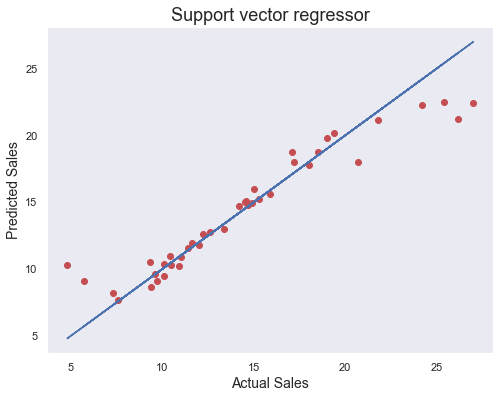

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [141]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


In [143]:
kn = KNeighborsRegressor(algorithm = 'brute', weights = 'distance',n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(y_test,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 97.24109753432346
Cross Val Score: 1.87556309096645
At cv:- 3
R2 Score: 97.24109753432346
Cross Val Score: 1.8668277414939727
At cv:- 4
R2 Score: 97.24109753432346
Cross Val Score: 1.902832925447978
At cv:- 5
R2 Score: 97.24109753432346
Cross Val Score: 1.9009130203730238
At cv:- 6
R2 Score: 97.24109753432346
Cross Val Score: 1.8898064851818557
At cv:- 7
R2 Score: 97.24109753432346
Cross Val Score: 1.9016059374411125
At cv:- 8
R2 Score: 97.24109753432346
Cross Val Score: 1.9011228734446286
At cv:- 9
R2 Score: 97.24109753432346
Cross Val Score: 1.8868527379429412


In [144]:
print("At cv:-",9)
print("Cross validation score is:-",97.24)
print("R2_score is :-",1.88)

At cv:- 9
Cross validation score is:- 97.24
R2_score is :- 1.88


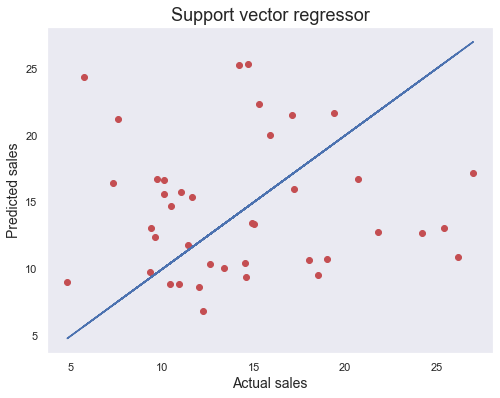

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# We tested 7 models out of which Random forest Regression performing Best as Accuracy score and CV is Optimum.

# Conclusion

In [159]:
import numpy as np
a=np.array(ytest)
a

array([10.5, 10.9,  7.3, 11.4, 18.5, 27. , 10.4, 11. ,  4.8,  9.7, 14.2,
       12.2, 15. , 11.6,  9.4, 25.4,  9.3, 12. , 14.6, 10.1, 17.1, 19. ,
       18. ,  9.6, 26.2, 20.7, 24.2, 19.4, 15.3, 10.1,  5.7, 15.9, 12.6,
       14.7, 17.2, 13.4,  7.6, 14.9, 21.8, 14.5])

In [160]:
predicted=np.array(pred_random)
predicted

array([11.219     , 11.26033333,  7.43733333, 11.57933333, 18.71333333,
       25.03733333, 10.73133333, 11.15066667,  4.92533333,  9.666     ,
       14.77833333, 12.98933333, 16.18466667, 12.09833333,  8.975     ,
       24.00733333,  9.94933333, 11.98133333, 15.478     , 10.52166667,
       17.727     , 18.40533333, 17.02333333,  9.545     , 25.21633333,
       20.37      , 24.31566667, 19.06233333, 14.01566667,  9.791     ,
        5.28733333, 15.45966667, 13.18166667, 15.17833333, 17.43333333,
       12.70833333,  8.32933333, 15.17266667, 22.02166667, 14.81966667])

In [161]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [162]:
df_com

,original,predicted
0,10.5,11.219000
1,10.9,11.260333
2,7.3,7.437333
3,11.4,11.579333
4,18.5,18.713333
5,27.0,25.037333
6,10.4,10.731333
7,11.0,11.150667
8,4.8,4.925333
9,9.7,9.666000


In [163]:
df_com.head(10)

,original,predicted
0,10.5,11.219000
1,10.9,11.260333
2,7.3,7.437333
3,11.4,11.579333
4,18.5,18.713333
5,27.0,25.037333
6,10.4,10.731333
7,11.0,11.150667
8,4.8,4.925333
9,9.7,9.666000


# The best model is Random Forest Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

In [165]:
print("At cv:-",19)
print("Cross validation score is:-",98.03)
print("R2_score is :-",98.50)

At cv:- 19
Cross validation score is:- 98.03
R2_score is :- 98.5


# Our Model performs with Accuracy 98.5%...

Saving the best models with initials...using pickle library

In [166]:
import pickle
filename = 'Advertising_sales_predict.pkl'
pickle.dump(rf, open(filename, 'wb'))